# Нейронная сеть

## Импорты

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
# Параметры
img_height, img_width = 224, 224
batch_size = 32

# Генераторы данных с аугментацией для обучения и без аугментации для валидации
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Путь к директориям с данными
train_dir = 'dataset\\train'
val_dir = 'dataset\\valid'

# Генераторы данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [6]:
# Загружаем предобученную модель VGG16 без верхних слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Замораживаем веса базовой модели
base_model.trainable = False

# Создаем новую модель
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # 10 классов
])

# Компилируем модель
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [7]:
# Обучаем модель
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10


c:\Users\Александр\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


93/93 ━━━━━━━━━━━━━━━━━━━━ 428s 5s/step - accuracy: 0.3252 - loss: 1.9581 - val_accuracy: 0.5726 - val_loss: 1.2498
Epoch 2/10
 1/93 ━━━━━━━━━━━━━━━━━━━━ 5:08 3s/step - accuracy: 0.4688 - loss: 1.5413

c:\Users\Александр\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4688 - loss: 1.5413 - val_accuracy: 0.1250 - val_loss: 1.9620
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.5463 - loss: 1.2963 - val_accuracy: 0.6018 - val_loss: 1.1417
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5938 - loss: 1.1777 - val_accuracy: 0.6250 - val_loss: 1.1108
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.6083 - loss: 1.1363 - val_accuracy: 0.6401 - val_loss: 1.0666
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5000 - loss: 1.2061 - val_accuracy: 0.8750 - val_loss: 0.4765
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 436s 5s/step - accuracy: 0.6570 - loss: 1.0212 - val_accuracy: 0.6714 - val_loss: 0.9976
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6250 - loss: 0.9866 - val_accuracy: 0.3750 - val_loss: 1.8889
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 438s 5s/step - accuracy: 0.6595 - loss: 0.9912 - val_accuracy: 0.6280 - val_loss: 1.

# Графики после обучения

## Обучение на каждой эпохе

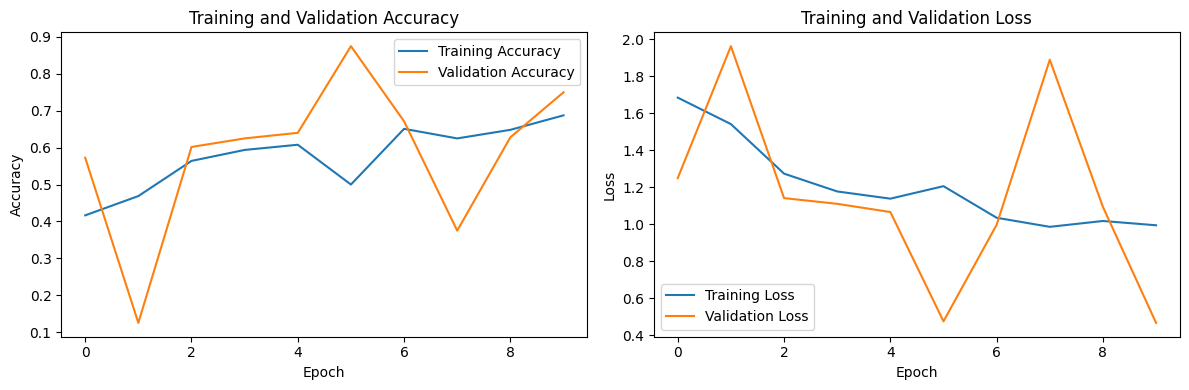

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графики потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Матрица ошибок


32/32 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step


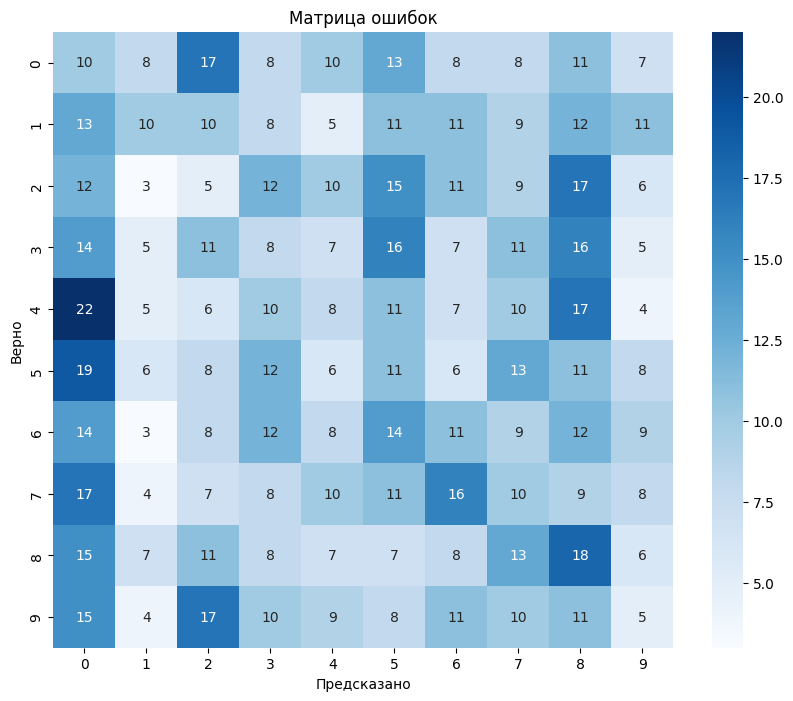

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получение предсказаний для валидационного набора
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Построение матрицы ошибок
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
plt.title('Матрица ошибок')
plt.xlabel('Предсказано')
plt.ylabel('Верно')
plt.show()

## Проверка на изображениях, где нейронная сеть ошибется

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


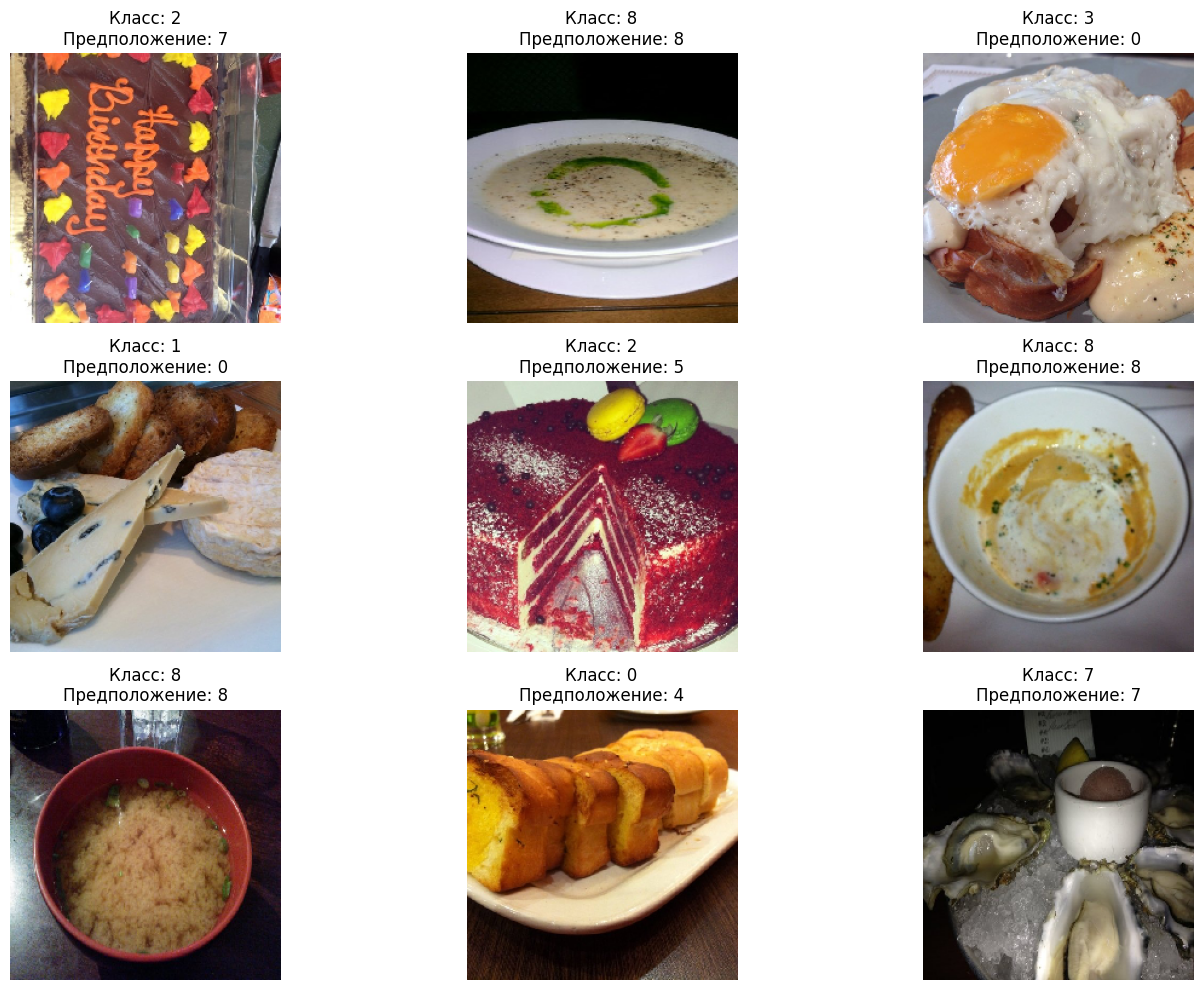

In [13]:
x_batch, y_batch = next(validation_generator)
y_pred_batch = model.predict(x_batch)
y_pred_batch_classes = np.argmax(y_pred_batch, axis=1)
y_true_batch = np.argmax(y_batch, axis=1)

class_names = list(validation_generator.class_indices.keys())
plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(f'Класс: {class_names[y_true_batch[i]]}\nПредположение: {class_names[y_pred_batch_classes[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()